In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from keras.utils import np_utils

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm_notebook

In [4]:
data= pd.read_csv(r'C://Users//harsh//Desktop//mini_project//A_Z Handwritten Data.csv').astype('float32')

In [5]:
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
x= data.drop('0',axis=1)
y= data['0']

In [7]:
data.shape

(372450, 785)

In [8]:
train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.2)
train_x= np.reshape(train_x.values, (train_x.shape[0],28,28))
test_x= np.reshape(test_x.values, (test_x.shape[0],28,28))
print('Train data shape:',train_x.shape)
print('Test data shape:',test_x.shape)

Train data shape: (297960, 28, 28)
Test data shape: (74490, 28, 28)


In [9]:
word_dict={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

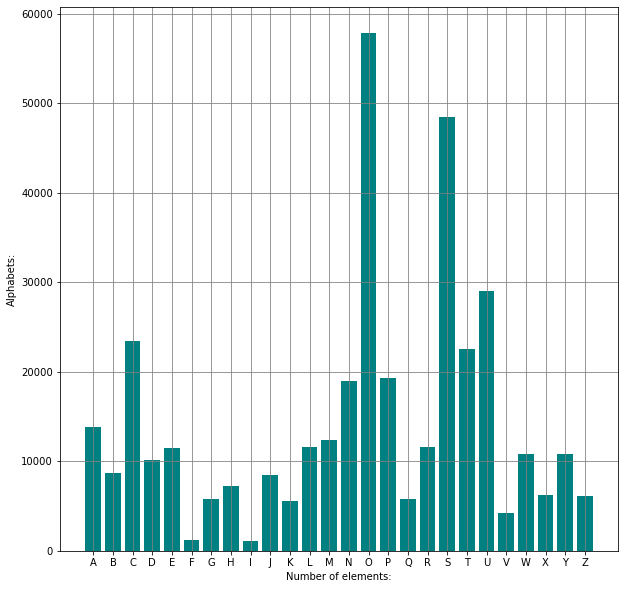

In [10]:
train_y1= np.int0(y)
count= np.zeros(26, dtype='int')
for i in train_y1:
    count[i]+=1
alpha=[]
for i in word_dict.values():
    alpha.append(i)
fig, ax= plt.subplots(1,1,figsize=(10,10))
ax.bar(alpha, count, color='teal')

plt.xlabel('Number of elements:')
plt.ylabel('Alphabets:')
plt.grid(color='grey',label='Lighten')
plt.show()

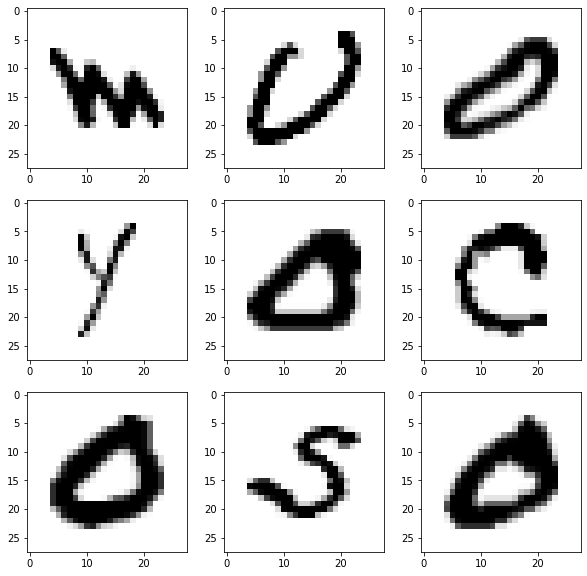

In [11]:
sh=shuffle(train_x[:100])
fig,ax=plt.subplots(3,3, figsize=(10,10))
axes=ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(sh[i],(28,28)),cmap='Greys')
plt.show()

In [12]:
train_x2=train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_x2=test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)
print('New shape of train data:',train_x2.shape)
print('New shape of test data', test_x2.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data (74490, 28, 28, 1)


In [13]:
train_y2=to_categorical(train_y,num_classes=26,dtype='int')
test_y2=to_categorical(test_y,num_classes=26,dtype='int')
print('New shape of train labels:',train_y2.shape)
print('New shape of test labels:',test_y2.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [14]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

In [15]:
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(26,activation='softmax'))

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=1,min_lr=0.0001)
early_stop=EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0,mode='auto')


In [17]:
history=model.fit(train_x2,train_y2,epochs=1,callbacks=[reduce_lr,early_stop],validation_data=(test_x2,test_y2))
model.summary()

9312/9312 [==============================] - 373s 40ms/step - loss: 0.1563 - accuracy: 0.9573 - val_loss: 0.0932 - val_accuracy: 0.9743
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)      

In [18]:
model.save(r'model_data.h5')

In [19]:
print('The validation accuracy is: ',history.history['val_accuracy'])
print('The training accuracy is: ',history.history['accuracy'])
print('The validation loss is: ',history.history['val_loss'])
print('The training loss is: ',history.history['loss'])

The validation accuracy is:  [0.9743455648422241]
The training accuracy is:  [0.9572828412055969]
The validation loss is:  [0.09324486553668976]
The training loss is:  [0.15630431473255157]


In [20]:
pre=model.predict(test_x2[:9])
print(test_x2.shape)

(74490, 28, 28, 1)


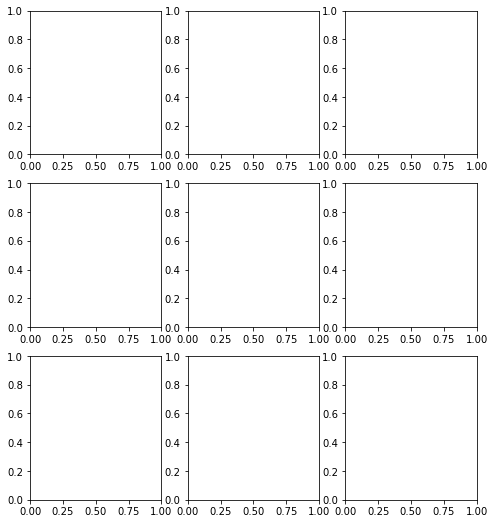

In [21]:
fig, axes = plt.subplots(3,3,figsize=(8,9))
axes= axes.flatten()

In [22]:
for i,ax in enumerate(axes):
    img=np.reshape(test_x2[i],(28,28))
    ax.imshow(img,cmap='Greys')
    pre=word_dict[np.argmax(test_y2[i])]
    ax.set_title('Prediction: '+pre)
    ax.grid()

In [23]:
#img=cv2.imread(r'C://Users//harsh//Desktop//mini_project//z.jpg')
img=cv2.imread(r'C://Users//harsh//Desktop//mini_project//b.jpg')
img_copy=img.copy()

In [24]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(400,440))

In [25]:
img_copy= cv2.GaussianBlur(img_copy,(7,7),0)
img_gray= cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)
_, img_thresh=cv2.threshold(img_gray,100,225,cv2.THRESH_BINARY_INV)

In [26]:
img_final= cv2.resize(img_thresh,(28,28))
img_final= np.reshape(img_final,(1,28,28,1))

In [27]:
img_pred=word_dict[np.argmax(model.predict(img_final))]

In [28]:
cv2.putText(img,'Provided image: ',(20,25),cv2.FONT_HERSHEY_TRIPLEX, 0.7,color=(0,0,230))
cv2.putText(img, 'Prediction: '+ img_pred,(20,410),cv2.FONT_HERSHEY_DUPLEX,1.3,color=(255,0,30))
cv2.imshow('DataFlair handwritten character recognition _ _ _ ',img)

In [ ]:
while(1):
    k=cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()